In [1]:
# Library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Visual confg. for graphs
sns.set(style='whitegrid')
%matplotlib inline

# Dataset uploading
df = pd.read_csv('/Users/alguov/Desktop/Iron Hack/Labs/EDA Labs/amz_uk_price_prediction_dataset.csv')

# Head viz
df.head()


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [2]:
# Frequency table for category column
freq_category = df['category'].value_counts()
print("Frecuencia de categorías:\n", freq_category)


Frecuencia de categorías:
 category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64


In [3]:
# Top 5 Categories
top5_categories = freq_category.head(5)
print("Top 5 categorías:\n", top5_categories)


Top 5 categorías:
 category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


/var/folders/rz/y5w2t9n931jd5fypn89ymc580000gn/T/ipykernel_4726/3009269688.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_categories.index, y=top5_categories.values, palette="viridis")


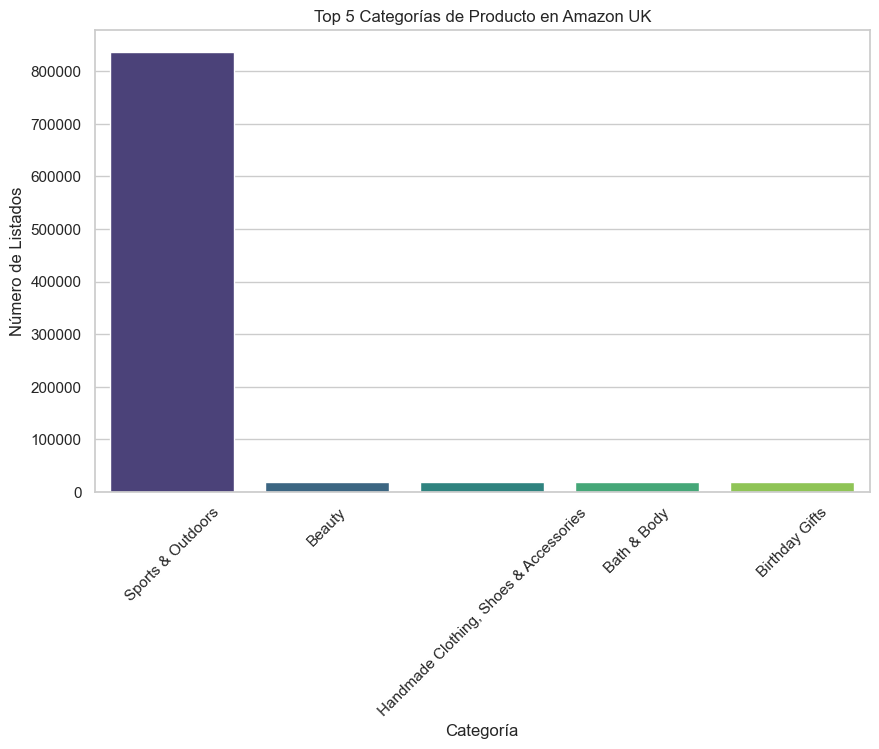

In [5]:
# Viz
plt.figure(figsize=(10,6))
sns.barplot(x=top5_categories.index, y=top5_categories.values, palette="viridis")
plt.title('Top 5 Categorías de Producto en Amazon UK')
plt.xlabel('Categoría')
plt.ylabel('Número de Listados')
plt.xticks(rotation=45)
plt.show()


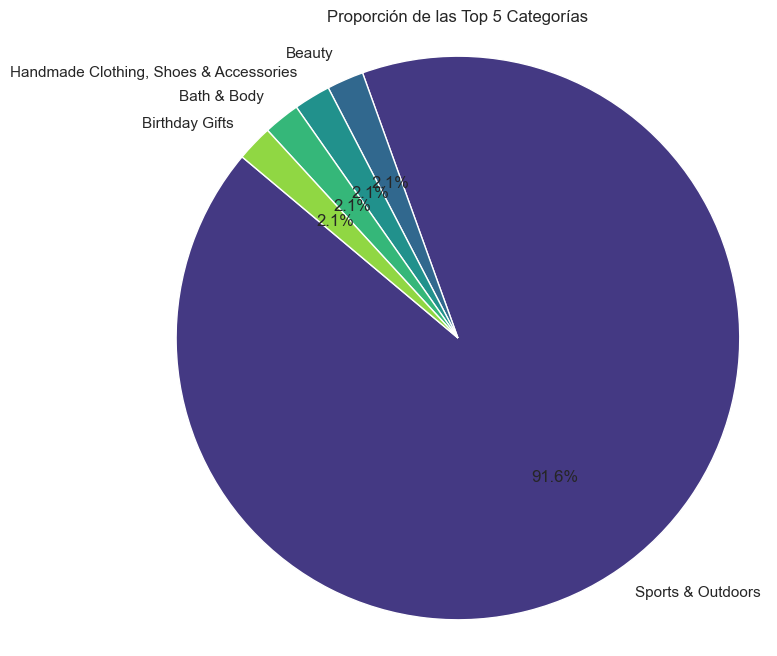

In [6]:
#Pie chart 
plt.figure(figsize=(8,8))
plt.pie(top5_categories.values, 
        labels=top5_categories.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette("viridis", len(top5_categories)))
plt.title('Proporción de las Top 5 Categorías')
plt.axis('equal')  # Para que el gráfico sea circular
plt.show()


In [7]:
# Mean, median, mode
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]  # Si hay más de un valor, se toma el primero

print(f"Media del precio: {mean_price:.2f}")
print(f"Mediana del precio: {median_price:.2f}")
print(f"Moda del precio: {mode_price:.2f}")


Media del precio: 89.24
Mediana del precio: 19.09
Moda del precio: 9.99


In [8]:
#Dispersion
variance_price = df['price'].var()
std_price = df['price'].std()
price_range = df['price'].max() - df['price'].min()
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr_price = q3 - q1

print(f"Varianza del precio: {variance_price:.2f}")
print(f"Desviación estándar: {std_price:.2f}")
print(f"Rango: {price_range:.2f}")
print(f"IQR: {iqr_price:.2f}")


Varianza del precio: 119445.49
Desviación estándar: 345.61
Rango: 100000.00
IQR: 36.00


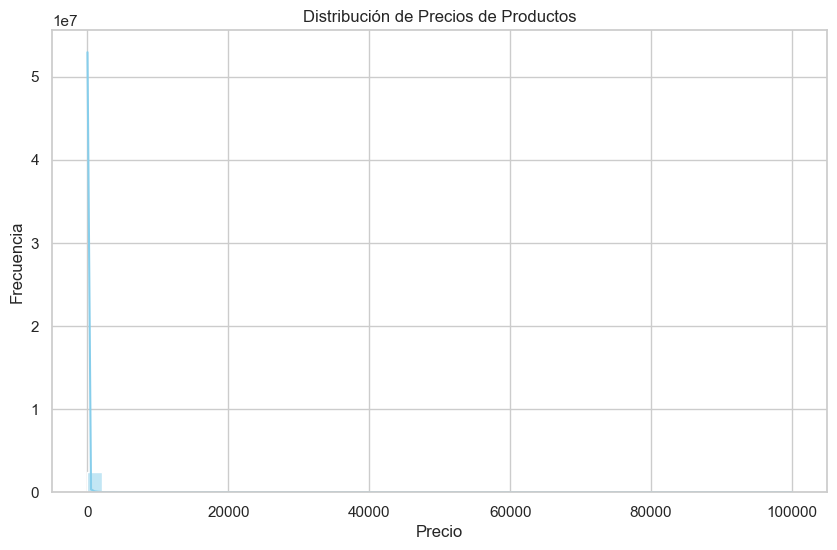

In [9]:
#Prizes histogram
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.title('Distribución de Precios de Productos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()


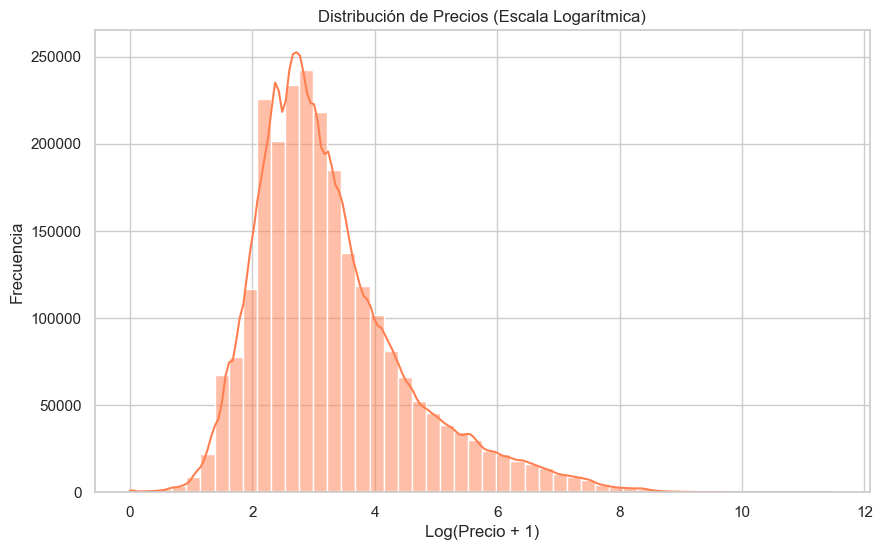

In [11]:
#Logaritmithc expression 
plt.figure(figsize=(10,6))
# np.log1p aplica log(1 + x) para evitar problemas con valores 0
sns.histplot(np.log1p(df['price']), bins=50, kde=True, color='coral')
plt.title('Distribución de Precios (Escala Logarítmica)')
plt.xlabel('Log(Precio + 1)')
plt.ylabel('Frecuencia')
plt.show()



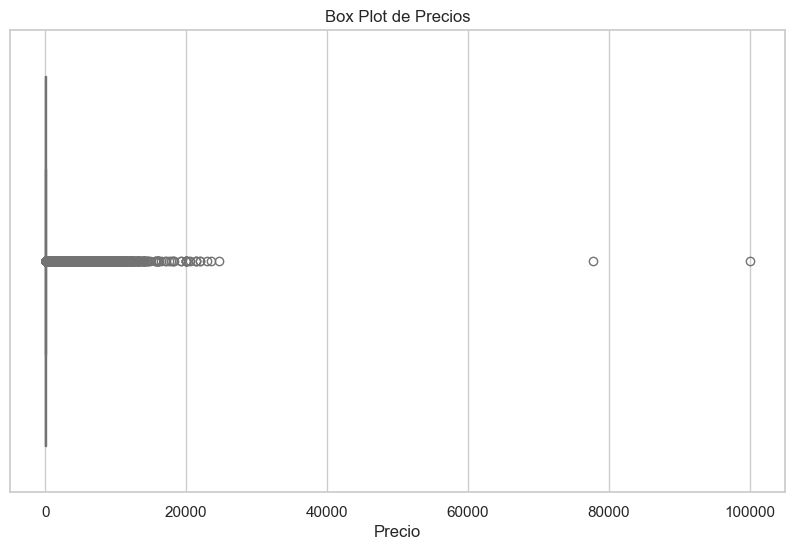

In [13]:
# Outliers expressions
plt.figure(figsize=(10,6))
sns.boxplot(x=df['price'], color='lightgreen')
plt.title('Box Plot de Precios')
plt.xlabel('Precio')
plt.show()


In [14]:
# Tendencies ratings
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

print(f"Media de las valoraciones (stars): {mean_rating:.2f}")
print(f"Mediana de las valoraciones (stars): {median_rating:.2f}")
print(f"Moda de las valoraciones (stars): {mode_rating:.2f}")


Media de las valoraciones (stars): 2.15
Mediana de las valoraciones (stars): 0.00
Moda de las valoraciones (stars): 0.00


In [15]:
# Variance ratings
variance_rating = df['stars'].var()
std_rating = df['stars'].std()
q1_rating = df['stars'].quantile(0.25)
q3_rating = df['stars'].quantile(0.75)
iqr_rating = q3_rating - q1_rating

print(f"Varianza de las valoraciones: {variance_rating:.2f}")
print(f"Desviación estándar: {std_rating:.2f}")
print(f"IQR: {iqr_rating:.2f}")


Varianza de las valoraciones: 4.82
Desviación estándar: 2.19
IQR: 4.40


In [16]:
#Skewness and Kurtosis
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

print(f"Skewness de las valoraciones: {skewness_rating:.2f}")
print(f"Kurtosis de las valoraciones: {kurtosis_rating:.2f}")


Skewness de las valoraciones: 0.08
Kurtosis de las valoraciones: -1.93


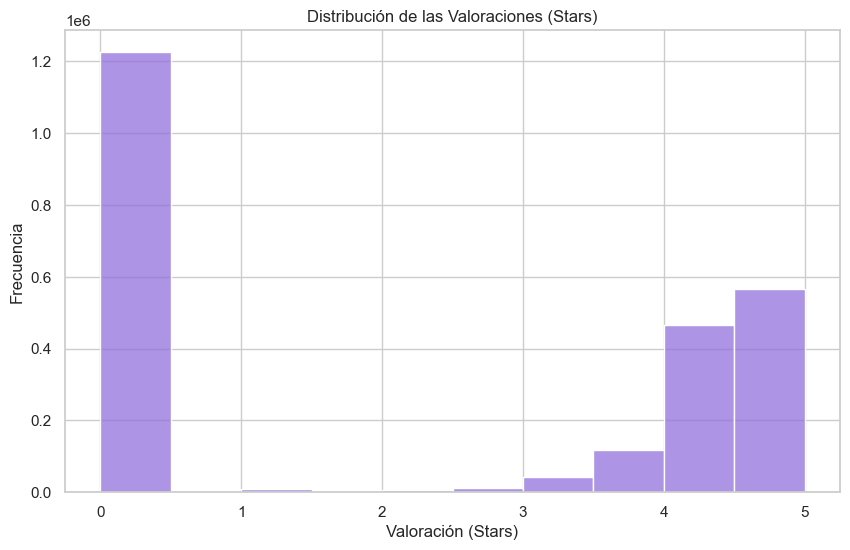

In [17]:
#Ratings Histogram
plt.figure(figsize=(10,6))
sns.histplot(df['stars'], bins=10, kde=False, color='mediumpurple')
plt.title('Distribución de las Valoraciones (Stars)')
plt.xlabel('Valoración (Stars)')
plt.ylabel('Frecuencia')
plt.show()


